In [1]:
from skimage.io import imread
dir_name='D:\\images\\'
im_name = dir_name+'tnia-python-images/deconvolution/microtubules/input.tif'
im=imread(im_name)

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, IntSlider, FloatRangeSlider
from IPython.core.display import display

# Define a function to display a 2D frame of the array with a given intensity range
def display_frame(frame, intensity_range):
    plt.imshow(im[frame], cmap='gray', vmin=intensity_range[0], vmax=intensity_range[1])
    plt.show()

# Use the interact function to create slider widgets that control the frame number and intensity range
frame_slider = IntSlider(min=0, max=im.shape[0]-1, step=1, value=0)
range_slider = FloatRangeSlider(min=np.min(im), max=np.max(im), step=0.1,
                                value=[np.min(im), np.max(im)], description='Intensity Range')


# Use the interact function to create a slider widget that controls the frame number
interact(display_frame, frame=frame_slider, intensity_range=range_slider)

C:\Users\bnort\AppData\Local\Temp\ipykernel_17092\3431984795.py:4: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display


interactive(children=(IntSlider(value=0, description='frame', max=127), FloatRangeSlider(value=(0.0, 1009.0), …

<function __main__.display_frame(frame, intensity_range)>

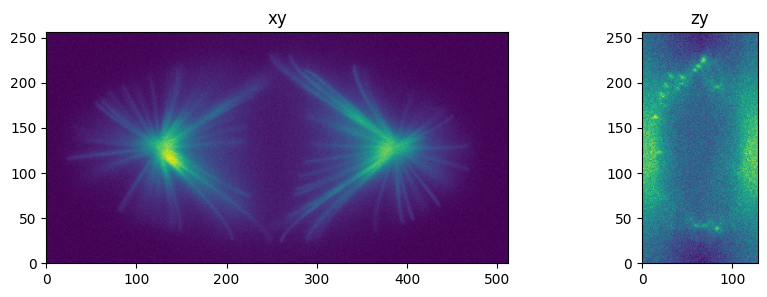

In [4]:
from tnia.plotting.projections import show_xy_zy_slice

fig=show_xy_zy_slice(im, im.shape[2]//2, im.shape[1]//2, im.shape[0]//2, )

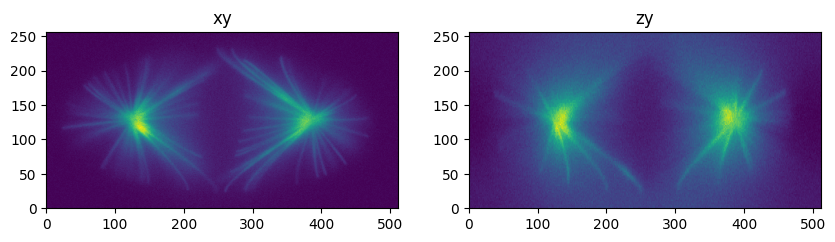

interactive(children=(IntSlider(value=0, description='z', max=127), Output()), _dom_classes=('widget-interact'…

<function __main__.display_z(z)>

In [19]:
from matplotlib import gridspec

figsize = (10, 10)
fig=plt.figure(figsize=figsize)

xy = im[im.shape[0]//2,:,:]
zy = im[:,im.shape[1]//2,:]

sxy=1
sz=1

colormap=None
vmax=None

xdim = xy.shape[1]
ydim = xy.shape[0]
zdim = zy.shape[1]

z_xy_ratio=1

if sxy!=sz:
    z_xy_ratio=sz/sxy

spec=gridspec.GridSpec(ncols=2, nrows=1, height_ratios=[ydim], width_ratios=[xdim,zdim*z_xy_ratio],hspace=.01)

ax0=fig.add_subplot(spec[0])
ax1=fig.add_subplot(spec[1])

if z_xy_ratio!=1:
    #xz=resize(xz, (int(xz.shape[0]*z_xy_ratio), xz.shape[1]))
    zy=resize(zy, (zy.shape[0], int(zy.shape[1]*z_xy_ratio)))

ax0.imshow(xy, colormap, vmax=vmax, extent = [0, xdim*sxy, 0, ydim*sxy])
ax0.set_title('xy')
ax1.imshow(zy, colormap, vmax=vmax, extent = [0, zdim*sz, 0, ydim*sxy])
ax1.set_title('zy')

# Define a function to display a 2D frame of the array with a given intensity range
def display_z(z):
    global ax0
    ax0.clear()
    xy = im[z,:,:]
    #ax0.imshow(xy, colormap, vmax=vmax, extent = [0, xdim*sxy, 0, ydim*sxy])
    fig.canvas.draw_idle()
    print('hello'+str(z))
    plt.show()

z_slider = IntSlider(min=0, max=im.shape[0]-1, step=1, value=0)


interact(display_z, z=z_slider)